<h2>Email Spam Classification<h2>

In [1]:
import pandas as pd
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, recall_score,f1_score,precision_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.shape

(5572, 2)

In [4]:
data.isna().sum()

Category    0
Message     0
dtype: int64

<Axes: xlabel='Category', ylabel='count'>

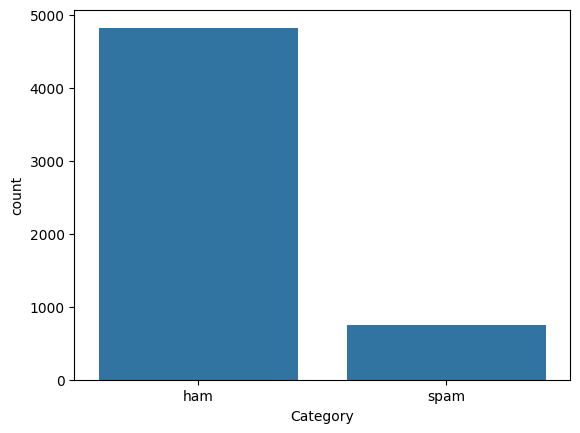

In [5]:
sns.barplot(data['Category'].value_counts())

Data Preprocessing
- Random Oversampling
- Lemmatization
- Lowercasing
- Tokenization
- Stopwords Eimination

In [7]:
count_ham, count_spam = data.Category.value_counts()
count_ham, count_spam

(4825, 747)

In [8]:
df_ham = data[data.Category == 'ham']
df_spam = data[data.Category == 'spam']

In [11]:
df_spam_oversampled = df_spam.sample(count_ham, replace=True)

new_df = pd.concat([df_spam_oversampled, df_ham])
new_df

,Category,Message
3067,spam,Get a brand new mobile phone by being an agent...
2881,spam,Last Chance! Claim ur £150 worth of discount v...
2095,spam,PRIVATE! Your 2004 Account Statement for 07742...
114,spam,GENT! We are trying to contact you. Last weeke...
4821,spam,Check Out Choose Your Babe Videos @ sms.shsex....
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
nlp = spacy.load('en_core_web_lg')

In [18]:
def preprocess_emails(email_text):
    doc = nlp(email_text)
    filtered_tokens = []

    for token in nlp(doc):
        if token.is_stop or token.is_punct or token.text.startswith('@'):
            continue

        filtered_tokens.append(token.lemma_.lower())
    return " ".join(filtered_tokens)

In [22]:
new_df['preprocessed_texts'] = new_df['Message'].apply(preprocess_emails)
new_df['label'] = new_df['Category'].apply(lambda x: 0 if x =='ham' else 1)

In [23]:
new_df.head()

,Category,Message,prcocessed_texts,label,preprocessed_texts
3067,spam,Get a brand new mobile phone by being an agent...,brand new mobile phone agent mob plus load goo...,1,brand new mobile phone agent mob plus load goo...
2881,spam,Last Chance! Claim ur £150 worth of discount v...,chance claim ur £ 150 worth discount voucher t...,1,chance claim ur £ 150 worth discount voucher t...
2095,spam,PRIVATE! Your 2004 Account Statement for 07742...,private 2004 account statement 07742676969 sho...,1,private 2004 account statement 07742676969 sho...
114,spam,GENT! We are trying to contact you. Last weeke...,gent try contact weekend draw show win £ 1000 ...,1,gent try contact weekend draw show win £ 1000 ...
4821,spam,Check Out Choose Your Babe Videos @ sms.shsex....,check choose babe videos sms.shsex.netun fgksl...,1,check choose babe videos sms.shsex.netun fgksl...


In [24]:
x_train, x_test, y_train, y_test = train_test_split(new_df['preprocessed_texts'],
                                                    new_df['label'],
                                                    test_size=0.2)

Model training

In [25]:
model = Pipeline([
    ('Tf-idf', TfidfVectorizer()),
    ('munb', MultinomialNB())
])

model.fit(x_train, y_train)

Pipeline(steps=[('Tf-idf', TfidfVectorizer()), ('munb', MultinomialNB())])

Model Evaluation

In [26]:
ypred = model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, ypred))
print('Precision: ', precision_score(y_test, ypred))
print('Recall: ', recall_score(y_test, ypred))
print('F1-Score: ', f1_score(y_test, ypred))
print('Roc-Auc: ', roc_auc_score(y_test, ypred))


Accuracy:  0.9720207253886011
Precision:  0.9517948717948718
Recall:  0.9925133689839573
F1-Score:  0.9717277486910995
Roc-Auc:  0.9726385940397173


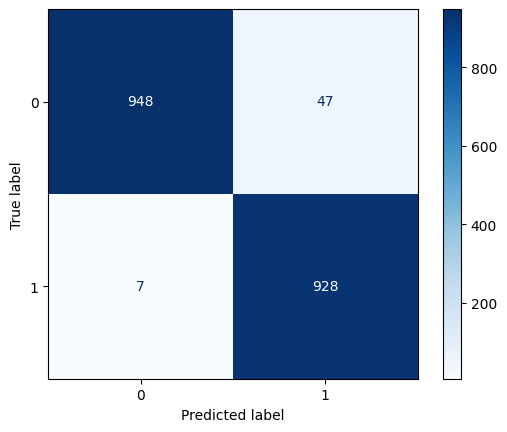

In [27]:
conf = confusion_matrix(y_test, ypred)

ConfusionMatrixDisplay(conf).plot(cmap='Blues')

In [28]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       995
           1       0.95      0.99      0.97       935

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

